# IT Academy - Data Science with Python
## Sprint 6: Data, Probabilities & Statistics
### [Github Data, Probabilities & Statistics](https://github.com/jesussantana/Statistics)

[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)  
[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)  
[![wakatime](https://wakatime.com/badge/github/jesussantana/Statistics.svg)](https://wakatime.com/badge/github/jesussantana/Statistics)

### Exercise 1:  

  - Grab a sports theme dataset you like and select an attribute from the dataset. Calculate the mode, median, standard deviation, and arithmetic mean.

In [1]:
import pandas as pd 
import numpy as np
import datetime
import warnings
import time

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats.mstats import gmean,hmean

warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='deep')

In [2]:
pd.set_option('display.max_columns', None)

path = '../data/'
file = 'raw/MLB_Stats.csv'

df_raw = pd.read_csv(path+file)

In [3]:
df = df_raw.copy()

In [4]:
df.head()

playerID    Player Name  weight  height bats throws  Season League teamID  \
0  aardsda01  David Aardsma     215      75    R      R    2004     NL    SFN   
1  aardsda01  David Aardsma     215      75    R      R    2007     AL    CHA   
2  aardsda01  David Aardsma     215      75    R      R    2008     AL    BOS   
3  aardsda01  David Aardsma     215      75    R      R    2009     AL    SEA   
4  aardsda01  David Aardsma     215      75    R      R    2012     AL    NYA   

                   Team             Franchise   G  AB  R  H  2B  3B  HR  RBI  \
0  San Francisco Giants  San Francisco Giants  11   0  0  0   0   0   0    0   
1     Chicago White Sox     Chicago White Sox  25   0  0  0   0   0   0    0   
2        Boston Red Sox        Boston Red Sox  47   1  0  0   0   0   0    0   
3      Seattle Mariners      Seattle Mariners  73   0  0  0   0   0   0    0   
4      New York Yankees      New York Yankees   1   0  0  0   0   0   0    0   

   SB  BB  SO  salary  IBB  HBP  SH  SF  PA  
0   0   0   0  300000    0    0   0   0   0  
1   0   0   0  387500    0    0   0   0   0  
2   0   0   1  403250    0    0   0   0   1  
3   0   0   0  419000    0    0   0   0   0  
4   0   0   0  500000    0    0   0   0   0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28293 entries, 0 to 28292
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   playerID     28293 non-null  object
 1   Player Name  28293 non-null  object
 2   weight       28293 non-null  int64 
 3   height       28293 non-null  int64 
 4   bats         28293 non-null  object
 5   throws       28293 non-null  object
 6   Season       28293 non-null  int64 
 7   League       28293 non-null  object
 8   teamID       28293 non-null  object
 9   Team         28293 non-null  object
 10  Franchise    28293 non-null  object
 11  G            28293 non-null  int64 
 12  AB           28293 non-null  int64 
 13  R            28293 non-null  int64 
 14  H            28293 non-null  int64 
 15  2B           28293 non-null  int64 
 16  3B           28293 non-null  int64 
 17  HR           28293 non-null  int64 
 18  RBI          28293 non-null  int64 
 19  SB           28293 non-nu

In [6]:
df.shape

(28293, 28)

## Runs Scored

### Mean  or Arithmetic Median 

In [7]:
df_mean = round(df.R.mean(), 2)
df_mean

21.79

### Median

In [8]:
df_median = round(df.R.median())
df_median

4

### Mode

In [9]:
df_mode = stats.mode(df.R)
df_mode

ModeResult(mode=array([0]), count=array([10555]))

### Standard Desviation

In [10]:
df_std = round(df.R.std(), 2)
df_std

30.13

### Resume

In [11]:
df.R.describe().round(2)

count    28293.00
mean        21.79
std         30.13
min          0.00
25%          0.00
50%          4.00
75%         37.00
max        152.00
Name: R, dtype: float64

### Exercise 2: 
  - Continuing with the sports topic data, select two attributes and calculate their correlation.

## Hits v Runs Scored

In [12]:
correlation =df[['H','R']].corr()
correlation

H         R
H  1.000000  0.973927
R  0.973927  1.000000

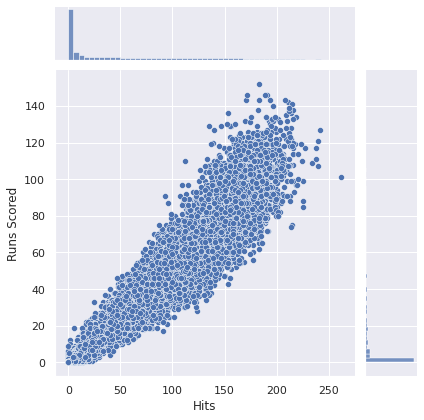

In [13]:
ax = sns.jointplot(df.H, df.R)
ax.set_axis_labels('Hits', 'Runs Scored')
plt.show()

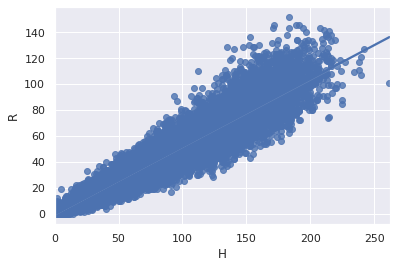

In [14]:
sns.regplot('H', 'R', df)
plt.show()

## Exercise 3
- Continuing with the sports theme data, calculate the correlation of all attributes with each other and represent them in a matrix with different colors of intensity.

### Pearson Correlation

- The Pearson Correlation measures the linear dependence between two variables X and Y.

- The resulting coefficient is a value between -1 and 1 inclusive, where:

  - 1: Total positive linear correlation.  

  - 0: No linear correlation, the two variables most likely do not affect each other.  

  - -1: Total negative linear correlation.  

Pearson Correlation is the default method of the function "corr". Like before we can calculate the Pearson Correlation of the of the 'int64' or 'float64' variables.

In [15]:
corr = df.corr()
corr.style.background_gradient(cmap="magma")

### Exercise 4: 
  - Continuing with the sports theme data, select an attribute and calculate the geometric mean and harmonic mean.

## Games

### Geometric Mean

In [16]:
geometric_mean = round(gmean(df.loc[:,'G']), 2)
geometric_mean

43.93

### Harmonic Mean

In [17]:
harmonic_mean = round(hmean(df.loc[:,'G']), 2)
harmonic_mean

22.37